In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
df = pd.read_csv('winequality-red.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Option 1: Evaluate based on the original 6 classes within 'quality'

In [28]:
#check count for each class
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logReg=LogisticRegression(solver='lbfgs',max_iter=10000)
df=pd.read_csv('winequality-red.csv').dropna()
x=df.iloc[:,:-1]
y=df.quality
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42)
model=logReg.fit(x_train,y_train)
y_pred=logReg.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy score :" ,accuracy_score(y_test,y_pred))

accuracy score : 0.5775


# Option 2: Evaluate based on the 2 classes only (1-high,0-low)

In [40]:
df1 = pd.read_csv('winequality-red.csv').dropna()
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
def myconverterfunction(_quality):
    if _quality > 5:
        return 1
    else:
        return 0

df1['quality'] = df1['quality'].apply(myconverterfunction)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [42]:
#check count for each class
df1['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logReg=LogisticRegression(solver='lbfgs',max_iter=10000)
x=df1.iloc[:,:-1]
y=df1.quality
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42)
model=logReg.fit(x_train,y_train)
y_pred=logReg.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy score :" ,accuracy_score(y_test,y_pred))

accuracy score : 0.7325


# Pearson Correlation based on Option 2:

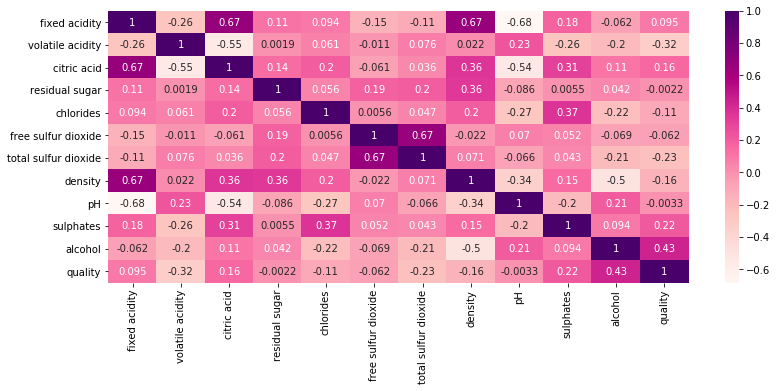

Correlated to quality :  ['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']
Removed:  []
Selected features:  ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [45]:
corr_mat = df1.corr()

plt.figure(figsize=(13,5))
sb.heatmap(data=corr_mat, annot=True, cmap='RdPu')
plt.show()

target = 'quality'
candidates = corr_mat.index[
    ((corr_mat[target] > 0.2) | (corr_mat[target] < -0.2))
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)

removed = []
for c1 in candidates:
    for c2 in candidates:
        if (c1 not in removed) and (c2 not in removed):
            if c1 != c2:
                coef = corr_mat.loc[c1, c2]
                if coef > 0.5 or coef < -0.5:
                    removed.append(c1)
print('Removed: ', removed)

selected_features = [x for x in candidates if x not in removed]
print('Selected features: ', selected_features)

# Apply PCA to capture the maximum variance

i =  1 : [0.28173931]
0.28173931278817316 

i =  2 : [0.28173931 0.1750827 ]
0.4568220118429409 

i =  3 : [0.28173931 0.1750827  0.1409585 ]
0.5977805108224623 

i =  4 : [0.28173931 0.1750827  0.1409585  0.11029387]
0.7080743772386741 

i =  5 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
0.7952827473610358 

i =  6 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
0.8552471350764368 

i =  7 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193]
0.9083190640939519 

i =  8 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061]
0.9467696731537681 

i =  9 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311 ]
0.9781007746827458 

i =  10 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483]
0.9945856080071008 

i =  11 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.0

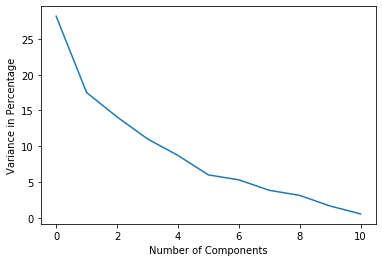

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# np.arange(start, stop, step) --> stops before the stop value is reached
for i in np.arange(1, 12, 1):
    y = df1.loc[:, 'quality'].values
    x = StandardScaler().fit_transform(df1.iloc[:, 0:-1])

    pca = PCA(n_components = i)
    pc = pca.fit_transform(x)
    print('i = ', i, ':', pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum(), '\n')
  
plt.plot(pca.explained_variance_ratio_*100)

plt.xlabel('Number of Components')
plt.ylabel('Variance in Percentage')
plt.show()